In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
city_file_to_load = 'Resources/city_data.csv'
ride_file_to_load = 'Resources/ride_data.csv'
pyber_city_df = pd.read_csv(city_file_to_load)
pyber_ride_df = pd.read_csv(ride_file_to_load)


In [3]:
pyber_city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
pyber_city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [5]:
pyber_city_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
pyber_city_df[['city','driver_count','type']].isna().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
pyber_city_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
sum(pyber_city_df['type']=='Urban')

66

In [9]:
sum(pyber_city_df['type']=='Suburban')

36

In [10]:
sum(pyber_city_df['type']=='Rural')

18

In [11]:
pyber_ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12


In [12]:
pyber_ride_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [18]:
pyber_ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
pyber_ride_df[['city','date','fare','ride_id']].isna().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [19]:
pyber_complete_df = pd.merge(pyber_ride_df,pyber_city_df,on=['city','city'],how='left')

In [20]:
pyber_complete_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [21]:
pyber_complete_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [23]:
pyber_complete_df.dtypes

city             object
date             object
fare            float64
ride_id         float64
driver_count      int64
type             object
dtype: object

In [77]:
pyber_by_city_average_df = pyber_complete_df.groupby('type').mean()['fare']

In [78]:
pyber_by_city_average_df.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [79]:
urban_cities_df = pyber_complete_df[pyber_complete_df['type']=='Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [86]:
rural_cities_df = pyber_complete_df[pyber_complete_df['type']=='Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4.018030e+12,2,Rural


In [87]:
suburban_cities_df = pyber_complete_df[pyber_complete_df['type']=='Suburban']
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,1/27/2019 3:08,27.79,6.653620e+12,11,Suburban
1626,East Kentstad,4/7/2019 19:44,18.75,6.575960e+12,20,Suburban
1627,Lake Omar,1/17/2019 21:33,21.71,9.669120e+11,22,Suburban
1628,Myersshire,2/27/2019 17:38,17.10,5.706770e+12,19,Suburban
1629,West Hannah,4/19/2019 1:06,37.78,2.273050e+12,12,Suburban


In [88]:
urban_cities_ride_count_df = urban_cities_df.groupby('city')['ride_id'].count()
urban_cities_ride_count_df.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [89]:
rural_cities_ride_count_df = rural_cities_df.groupby('city')['ride_id'].count()
rural_cities_ride_count_df.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [90]:
suburban_cities_ride_count_df = suburban_cities_df.groupby('city')['ride_id'].count()
suburban_cities_ride_count_df.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [91]:
urban_average_fare_df = urban_cities_df.groupby('city').mean()['fare']
urban_average_fare_df.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [92]:
rural_average_fare_df = rural_cities_df.groupby('city').mean()['fare']
rural_average_fare_df.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [93]:
suburban_average_fare_df = suburban_cities_df.groupby('city').mean()['fare']
suburban_average_fare_df.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [95]:
urban_average_drivers_df = urban_cities_df.groupby('city').mean()['driver_count']
urban_average_drivers_df.head()

city
Amandaburgh        12
Barajasview        26
Carriemouth        52
Christopherfurt    41
Deanville          49
Name: driver_count, dtype: int64

In [96]:
rural_average_drivers_df = rural_cities_df.groupby('city').mean()['driver_count']
rural_average_drivers_df.head()

city
Bradshawfurt      7
Garzaport         7
Harringtonfort    4
Jessicaport       1
Lake Jamie        4
Name: driver_count, dtype: int64

In [97]:
suburban_average_drivers_df = suburban_cities_df.groupby('city').mean()['driver_count']
suburban_average_drivers_df.head()

city
Barronchester    11
Bethanyland      22
Brandonfort      10
Colemanland      23
Davidfurt        23
Name: driver_count, dtype: int64

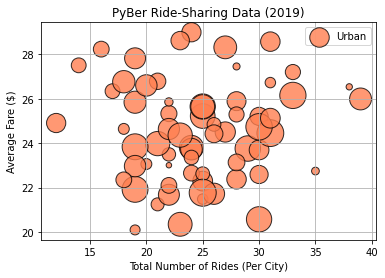

In [115]:
plt.scatter(urban_cities_ride_count_df,
            urban_average_fare_df,
            label='Urban',c='coral',
            s=urban_average_drivers_df*10,
           edgecolor='k',linewidths=1,
           alpha=0.8)
plt.legend()
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()

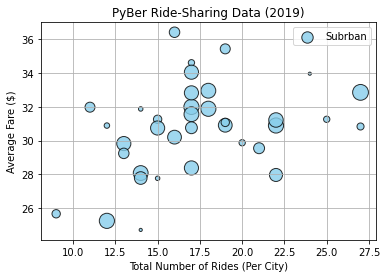

In [117]:
plt.scatter(suburban_cities_ride_count_df,
            suburban_average_fare_df,
            label='Subrban',c='skyblue',
            s=suburban_average_drivers_df*10,
           edgecolor='k',linewidths=1,
           alpha=0.8)
plt.legend()
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()

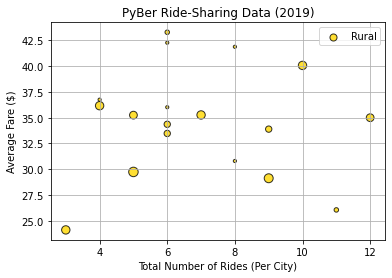

In [118]:
plt.scatter(rural_cities_ride_count_df,
            rural_average_fare_df,
            label='Rural',c='gold',
            s=rural_average_drivers_df*10,
           edgecolor='k',linewidths=1,
           alpha=0.8)
plt.legend()
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()